**QUESTION**:

Consider the problem of developing a correlation between saturated pressure (Psat) and saturated temperature T (boiling point). Data for saturated pressure for n-hexane in the temperature range 10 - 70 deg C are given in file vpdata.txt (first column is temp in K and second column is pressure in kPa).


(a) The Classius-Clapeyron equation is a theoretically derived model between Psat and T and is given in Classius-Clapeyron equation.jpg
Assuming that temperature measurements are noise-free and pressure measurements are noisy, use linear regression to obtain estimates of parameters A’ and B’ 
(Hint: Define transformed input and output variables to first convert this to a linear regression problem).


(b) Fit a polynomial model of order 2 between saturated pressures and temperature by using multilinear (OLS) regression and report the coefficients of the model. 
(c) Evaluate the quality of the model by dividing your data set into training and test sets, and determine the optimal value of the model hyperparameter (order of the polynomial). 
(d) What happens if you attempt to fit a 10th order polynomial to the data? Can you suggest some modification for fitting a 10th order model which is numerically stable/accurate?

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vpdata/vpdata.txt


In [31]:
# defining the column names
columns=["temp","pressure"]

As the data is in txt format, we convert this file into csv file by seperating the values with spaces and assigning the column names.

In [32]:
# Reading and printing the vpdata
vp_data=pd.read_csv("/kaggle/input/vpdata/vpdata.txt",sep='\s+',names=columns)
print(vp_data)

         temp   pressure
0   274.74978  42.068686
1   257.60110  22.829599
2   282.38801  55.867600
3   288.21548  70.936874
4   266.93534  33.139607
..        ...        ...
95  297.72529  94.355942
96  256.50485  19.314426
97  255.44508  18.838659
98  296.10036  94.768984
99  244.55494  11.444198

[100 rows x 2 columns]


In [33]:
# printing the top 5 rows to check whether all columns are there or not.
vp_data.head()

,temp,pressure
0,274.74978,42.068686
1,257.60110,22.829599
2,282.38801,55.867600
3,288.21548,70.936874
4,266.93534,33.139607


In [34]:
# printing the information about the dataframe to check the existence of null values.
vp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp      100 non-null    float64
 1   pressure  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


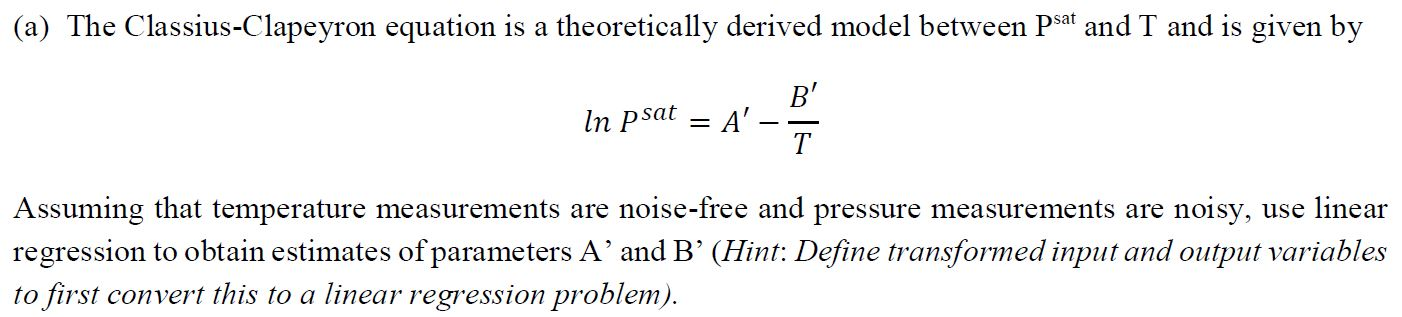

To obtain the parameters A' and B', we are transforming the pressure data into logarthmic pressure data and temperature data into negative of inverse temperature data and fit a regression line between the transformed pressure and temperature data.

In [35]:
transformed_data=pd.DataFrame({})
transformed_data["pressure"]=np.log(vp_data["pressure"])
transformed_data["temp"]=np.negative(np.reciprocal(vp_data["temp"]))
# printing the top 5 rows to check whether all columns are there or not.
transformed_data.head()
# printing the information about the dataframe to check the existence of null values.
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pressure  100 non-null    float64
 1   temp      100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


Importing the necessary libraries.

In [36]:
import matplotlib .pyplot as plt
import pandas as pd
import statsmodels .api as sm
from statsmodels .formula.api import ols

In [37]:
# Building the ols model between pressure and temp
model = ols("pressure~temp", data=transformed_data)
model_matrix = pd. DataFrame (model.exog ,columns=model. exog_names )
print( model_matrix )

    Intercept      temp
0         1.0 -0.003640
1         1.0 -0.003882
2         1.0 -0.003541
3         1.0 -0.003470
4         1.0 -0.003746
..        ...       ...
95        1.0 -0.003359
96        1.0 -0.003899
97        1.0 -0.003915
98        1.0 -0.003377
99        1.0 -0.004089

[100 rows x 2 columns]


Visualizing the transformed data using scatter plot.

Text(0, 0.5, 'pressure')

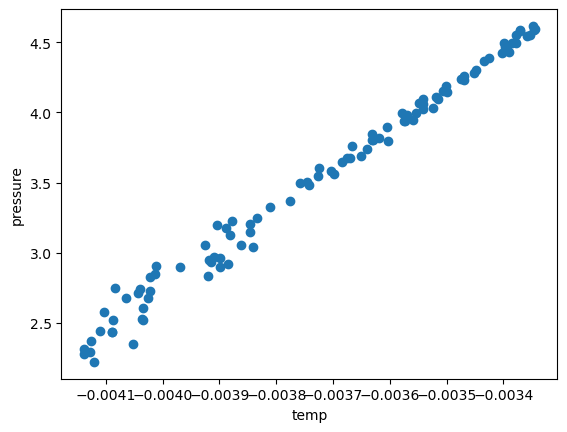

In [38]:
plt.scatter(transformed_data.temp , transformed_data.pressure)
plt.xlabel("temp")
plt.ylabel("pressure")

From the above plot, we can clearly see that the transformed temp and pressure points are linear to each other.

In [39]:
fit = model.fit () #fit the model defined above
b0 , b1= fit.params
print(fit.params)

Intercept      14.097312
temp         2837.286090
dtype: float64


The above output gives the least-squares estimates of β0 and β1.

Although ols performs a complete analysis of the linear model, not all its calculations
need to be presented. A summary of the results can be obtained with the method summary.

In [40]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8564.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           3.42e-97
Time:                        17:04:46   Log-Likelihood:                 115.34
No. Observations:                 100   AIC:                            -226.7
Df Residuals:                      98   BIC:                            -221.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0973      0.114    123.166      0.000      13.870      14.324
temp        2837.2861     30.659     92.542      0.000    2776.444    2898.129
==============================================================================
Omnibus:                        5.819   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                9.178
Skew:                           0.029   Prob(JB):                       0.0102
Kurtosis:                       4.483   Cond. No.                     3.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**CONCLUSION1**:

From the above summary, we can obtain the parameters as the regression coefficients. On comparing the values, A'=14.093 and B'=2837.28.

Visualizing the original data using scatter plot.

Text(0, 0.5, 'pressure')

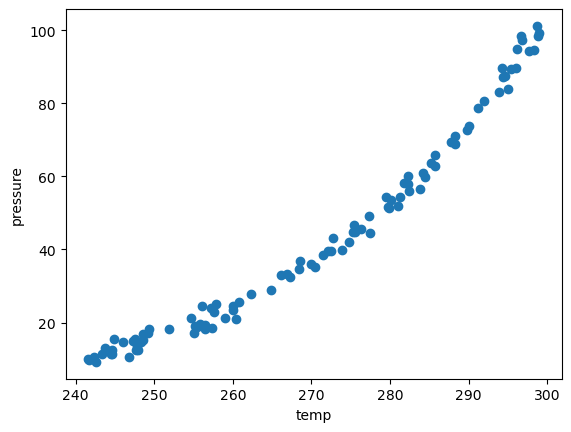

In [41]:
plt.scatter(vp_data.temp , vp_data.pressure)
plt.xlabel("temp")
plt.ylabel("pressure")

From the above plot, we can see that the linear single order line may not be perfectly fitted to the data, So, inorder to fit the data perfectly we will develop a polynomial regression curve.

To  Fit a polynomial model of order 2 between saturated pressures and temperature by using multilinear (OLS) regression, add the variable I(temp**2) to the formula.

In [42]:
model2 = ols("pressure ~ temp + I(temp**2)", data=vp_data)
fit2 = model2.fit () #fit the model defined above
b0 , b1, b2= fit2.params
print(fit2.params)

Intercept       1309.314759
temp             -10.932168
I(temp ** 2)       0.023024
dtype: float64


The above output gives the least-squares estimates of β0,β1 and β2.

Although ols performs a complete analysis of the linear model, not all its calculations
need to be presented. A summary of the results can be obtained with the method summary.

In [43]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8556.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          8.39e-110
Time:                        17:04:46   Log-Likelihood:                -215.99
No. Observations:                 100   AIC:                             438.0
Df Residuals:                      97   BIC:                             445.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1309.3148     57.447     22.792      0.000    1195.299    1423.331
temp           -10.9322      0.427    -25.594      0.000     -11.780     -10.084
I(temp ** 2)     0.0230      0.001     29.107      0.000       0.021       0.025
==============================================================================
Omnibus:                        2.168   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                2.109
Skew:                           0.346   Prob(JB):                        0.348
Kurtosis:                       2.839   Cond. No.                     1.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above summary, the R2 value indicates the perfect fit of the data, but what if we increase the order of polynomial. Lets see!!

In order to compare the different order models, we will divide the dataset into train and test so that we can check the accuracy of the models.

In [44]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(vp_data,test_size=0.2)

In [45]:
# printing the top 5 rows to check whether all columns are there or not.
train.head()

,temp,pressure
57,247.28180,15.015217
67,246.72933,10.486180
93,255.76565,19.536105
8,280.96252,51.821770
18,275.54262,44.855027


In [46]:
test.head()

,temp,pressure
23,269.99832,35.915859
94,272.42979,39.489199
43,242.19994,9.891322
4,266.93534,33.139607
73,260.02329,24.554353


In [47]:
# fitting the train dataset to the second order polynomial regression.
model3 = ols("pressure ~ temp + I(temp**2)", data=train)
fit3 = model3.fit () #fit the model defined above
b0 , b1, b2= fit3.params
print(fit3.params)

Intercept       1360.875293
temp             -11.320613
I(temp ** 2)       0.023753
dtype: float64


In [48]:
# printing the summary of model3
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6645.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           5.98e-87
Time:                        17:04:46   Log-Likelihood:                -174.30
No. Observations:                  80   AIC:                             354.6
Df Residuals:                      77   BIC:                             361.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1360.8753     65.980     20.625      0.000    1229.491    1492.259
temp           -11.3206      0.491    -23.079      0.000     -12.297     -10.344
I(temp ** 2)     0.0238      0.001     26.153      0.000       0.022       0.026
==============================================================================
Omnibus:                        2.771   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.719
Skew:                           0.402   Prob(JB):                        0.257
Kurtosis:                       2.590   Cond. No.                     1.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# computing the predictions of test data
test_result1=fit3.predict(test)
print(test_result1,test)

23    35.881384
94    39.683075
43    12.377999
4     31.492047
73    23.224587
44    39.171786
34    14.112839
48    78.590863
68    80.359208
32    25.744955
9     87.462529
17    14.830051
20    74.962031
46    75.670690
65    18.413955
77    12.279507
21    61.218934
13    56.998177
78    97.516008
40    48.248706
dtype: float64          temp   pressure
23  269.99832  35.915859
94  272.42979  39.489199
43  242.19994   9.891322
4   266.93534  33.139607
73  260.02329  24.554353
44  272.11296  39.439680
34  247.69474  12.511829
48  291.24266  78.626371
68  291.94117  80.743492
32  262.34196  27.714147
9   294.65987  87.597624
17  249.18393  17.265415
20  289.77957  72.553243
46  290.06854  73.697713
65  254.71213  21.180681
77  241.62588  10.103425
21  283.81418  56.442862
13  281.81827  58.206192
78  298.29750  94.539946
40  277.35729  49.231506


In [50]:
# computing the mse for the assessment of model
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(test["pressure"],test_result1)

In [51]:
# printing the mean square error of the test data
print(mse1)

3.9746989118627396


Now lets try for the cubic polynomial..

In [52]:
# fitting the train dataset to the third order polynomial regression.
mod4 = ols("pressure ~ temp + I(temp**2) + I(temp**3)", data=train)
fit4 = mod4.fit () #fit the model defined above
b0 , b1, b2,b3= fit4.params
print(fit4.params)

Intercept      -2634.884720
temp              33.173250
I(temp ** 2)      -0.140979
I(temp ** 3)       0.000203
dtype: float64


In [53]:
# printing the summary of model4
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5105.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.58e-87
Time:                        17:04:46   Log-Likelihood:                -168.13
No. Observations:                  80   AIC:                             344.3
Df Residuals:                      76   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2634.8847   1124.662     -2.343      0.022   -4874.842    -394.927
temp            33.1733     12.513      2.651      0.010       8.251      58.095
I(temp ** 2)    -0.1410      0.046     -3.045      0.003      -0.233      -0.049
I(temp ** 3)     0.0002    5.7e-05      3.558      0.001    8.93e-05       0.000
==============================================================================
Omnibus:                        1.918   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.588
Skew:                           0.190   Prob(JB):                        0.452
Kurtosis:                       2.423   Cond. No.                     9.99e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# computing the predictions of test data
test_result2=fit4.predict(test)
mse2=mean_squared_error(test["pressure"],test_result2)
print(mse2)

2.946033627310203


From the above output, we can see that the mean square error decreased compared to the polynomial fit of order 2 and even the R2 value improved.
Now lets try for the 10 th degree polynomial.

In [55]:
model5 = ols("pressure ~ temp + I(temp**2) + I(temp**3)+ I(temp**4)+ I(temp**5)+ I(temp**6)+ I(temp**7)+ I(temp**8)+ I(temp**9)+ I(temp**10)", data=train)
fit5 = model5.fit () #fit the model defined above
print(fit5.summary())

                            OLS Regression Results                            
Dep. Variable:               pressure   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5105.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.59e-87
Time:                        17:04:46   Log-Likelihood:                -168.14
No. Observations:                  80   AIC:                             344.3
Df Residuals:                      76   BIC:                             353.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.852e-24   3.29e-23     -0.239

**CONCLUSION2**:

From the above summary we can see that the p values of all the regression coefficients are greater than 0.05 and If we further increase the degree to 10, the curve will pass through more data points. For degree=10, the model is also capturing the noise in the data. This is an example of over-fitting. Even though this model passes through most of the data, it will fail to generalize on unseen data.

The optimal value of the model hyperparameter (order of the polynomial) is 3.

For fitting a 10th order model which is numerically stable/accurate, lets try by including only the 10th order variable and neglecting the remaining ones.

In [57]:
model6 = ols("pressure ~  I(temp**10)", data=train)
fit6 = model6.fit () #fit the model defined above
print(fit6.summary())

                            OLS Regression Results                            
Dep. Variable:               pressure   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 22 Mar 2023   Prob (F-statistic):                nan
Time:                        17:04:46   Log-Likelihood:                -173.40
No. Observations:                  80   AIC:                             348.8
Df Residuals:                      79   BIC:                             351.2
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.153e-48   2.41e-50    214.137

In [58]:
test_result4=fit6.predict(test)
mse4=mean_squared_error(test["pressure"],test_result4)
print(mse4)

3.067047998783252


**CONCLUSION3**:

This model some what indicates that it can predict the test values compared to the previous ones.
So, I suggest that the inclusion of only the 10th order term may fit the data which is numerically stable.